In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [2]:
import pathlib
PATH = '../input/intel-image-classification/seg_train/seg_train'
data_dir = pathlib.Path(PATH)
classes=np.array([item.name for item in data_dir.glob('*') if item.name!='LICENSE.txt'])
print(classes)

test_path = '../input/intel-image-classification/seg_test/seg_test'
test_data = pathlib.Path(test_path)

# now we have the path for our train images and test images

['mountain' 'street' 'buildings' 'sea' 'forest' 'glacier']


In [3]:
# Since our dataset is small we need to create some more tranining data 
# We will perform Data Augmentation for this ( basically we will take our train images and make more images from them
# by zooming in-out,  scaling them , moving horizontally and vertically.)
# this is done using the ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IDG=ImageDataGenerator(rescale=1./255,width_shift_range=.1,height_shift_range=.1,zoom_range=.1,validation_split=.2,rotation_range=10)

train=IDG.flow_from_directory(PATH,subset='training',target_size=(150,150),classes=list(classes),batch_size=64)

# here we have created training data in batches of 64 images

Found 11230 images belonging to 6 classes.


In [4]:
## we followed the same procedure with our validation data

validation=IDG.flow_from_directory(PATH,subset='validation',batch_size=64,target_size=(150,150),classes=list(classes))

Found 2804 images belonging to 6 classes.


In [5]:
# we did not perform image Augmentation on our test data because we want it keep it intact
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG_test=ImageDataGenerator(rescale=1./255)
test=IDG_test.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


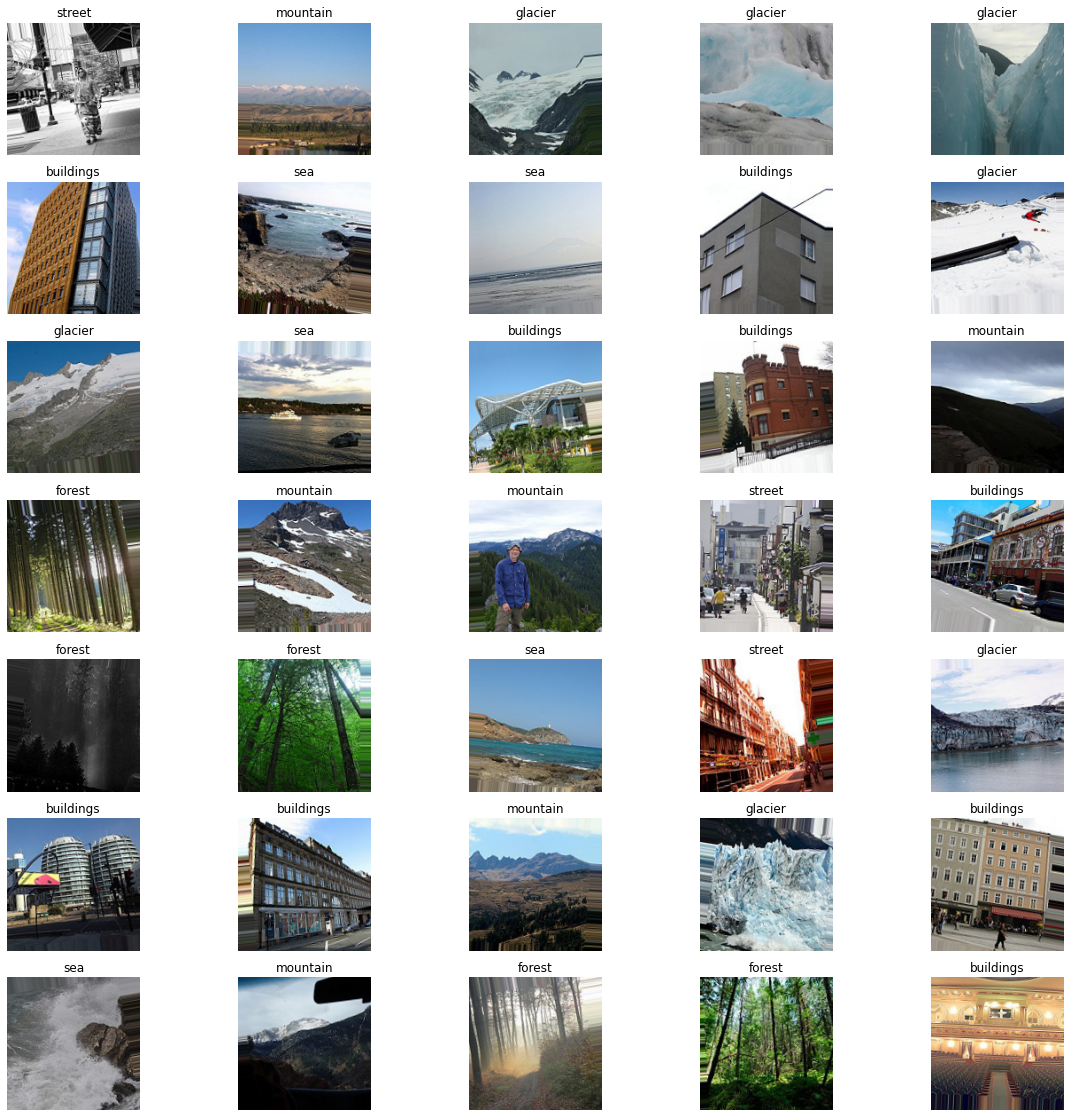

In [6]:
# let's take a look at some of the images in our dataset
from matplotlib import pyplot as plt
image_batch,batch_lable=next(train)
def show_images(image_batch,batch_lable):
    plt.figure(figsize=(20,20))
    for i in range(35):
        plt.subplot(7,5,i+1)
        plt.imshow(image_batch[i])
        plt.title(classes[batch_lable[i].argmax()])
        plt.axis('off')
show_images(image_batch,batch_lable)        

# we have shown 35 images from our dataset along with there labels

In [7]:
# let's download all the required libraries and functions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

In [8]:
# let's define our model now .

model=Sequential([])
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [9]:
import tensorflow as tf
lo=tf.keras.losses.categorical_crossentropy
model.compile(optimizer='adam',loss=lo,metrics=['accuracy'])

In [10]:
history=model.fit_generator(train,epochs=20,steps_per_epoch=train.samples//64,validation_data=validation,validation_steps=validation.samples//64)

Epoch 1/20
175/175 [==============================] - 159s 910ms/step - loss: 1.3167 - accuracy: 0.4474 - val_loss: 0.9997 - val_accuracy: 0.6079
Epoch 2/20
175/175 [==============================] - 104s 594ms/step - loss: 1.0394 - accuracy: 0.5891 - val_loss: 0.8858 - val_accuracy: 0.6646
Epoch 3/20
175/175 [==============================] - 103s 588ms/step - loss: 0.9056 - accuracy: 0.6677 - val_loss: 0.7317 - val_accuracy: 0.7431
Epoch 4/20
175/175 [==============================] - 104s 596ms/step - loss: 0.8020 - accuracy: 0.7112 - val_loss: 0.6646 - val_accuracy: 0.7584
Epoch 5/20
175/175 [==============================] - 104s 596ms/step - loss: 0.7388 - accuracy: 0.7371 - val_loss: 0.6405 - val_accuracy: 0.7671
Epoch 6/20
175/175 [==============================] - 103s 590ms/step - loss: 0.6821 - accuracy: 0.7679 - val_loss: 0.6767 - val_accuracy: 0.7416
Epoch 7/20
175/175 [==============================] - 104s 593ms/step - loss: 0.6478 - accuracy: 0.7687 - val_loss: 0.5838 -

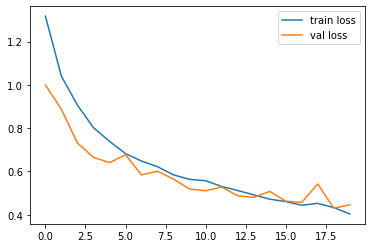

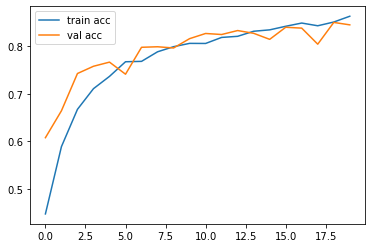

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')